In [2]:
#importing packages for project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Importing the data
df = pd.read_csv("co2_emissions_from_agri.csv")

# Show preview of data

df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


# DATA CLEANING

In [4]:
# Standardize column names
df.columns = (
   df.columns
   .str.strip()
   .str.lower()
   .str.replace(' ', '_', regex=False)
   .str.replace('(', '', regex=False)
   .str.replace(')', '', regex=False)
)

In [5]:
# Convert 'Year' to integer
df['year'] = df['year'].astype(int)

# Convert population columns to integer
population_columns = [
    'rural_population', 
    'urban_population', 
    'total_population_-_male', 
    'total_population_-_female'
]
for column in population_columns:
    df[column] = df[column].astype(int)

In [6]:
# Ensure each row is a unique country-year observation

df.drop_duplicates(subset=['area', 'year'], inplace=True)

In [7]:
# Fill missing values: 0 for numeric columns, 'Unknown' for object (text) columns

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna('Unknown')
    else:
        df[column] = df[column].fillna(0)

In [8]:
# Save the cleaned dataset

df.to_csv('cleaned_co2_emissions_from_agri.csv', index=False)

EDA: 
Distribution of Total Emissions and Average Temperature Emissions are right-skewed, with most values concentrated at the lower end. Average temperature shows a near-normal distribution centered around ~0.87°C.

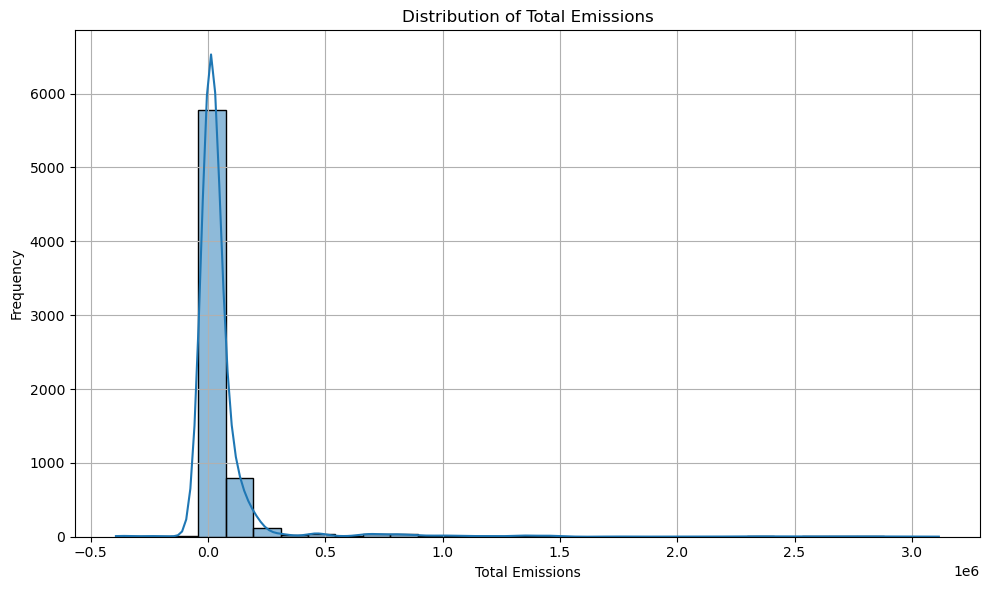

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['total_emission'], kde=True, bins=30)
plt.title('Distribution of Total Emissions')
plt.xlabel('Total Emissions')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

## Distribution of Average Temperature

Index(['area', 'year', 'savanna_fires', 'forest_fires', 'crop_residues',
       'rice_cultivation', 'drained_organic_soils_co2',
       'pesticides_manufacturing', 'food_transport', 'forestland',
       'net_forest_conversion', 'food_household_consumption', 'food_retail',
       'on-farm_electricity_use', 'food_packaging',
       'agrifood_systems_waste_disposal', 'food_processing',
       'fertilizers_manufacturing', 'ippu', 'manure_applied_to_soils',
       'manure_left_on_pasture', 'manure_management', 'fires_in_organic_soils',
       'fires_in_humid_tropical_forests', 'on-farm_energy_use',
       'rural_population', 'urban_population', 'total_population_-_male',
       'total_population_-_female', 'total_emission',
       'average_temperature_°c'],
      dtype='object')


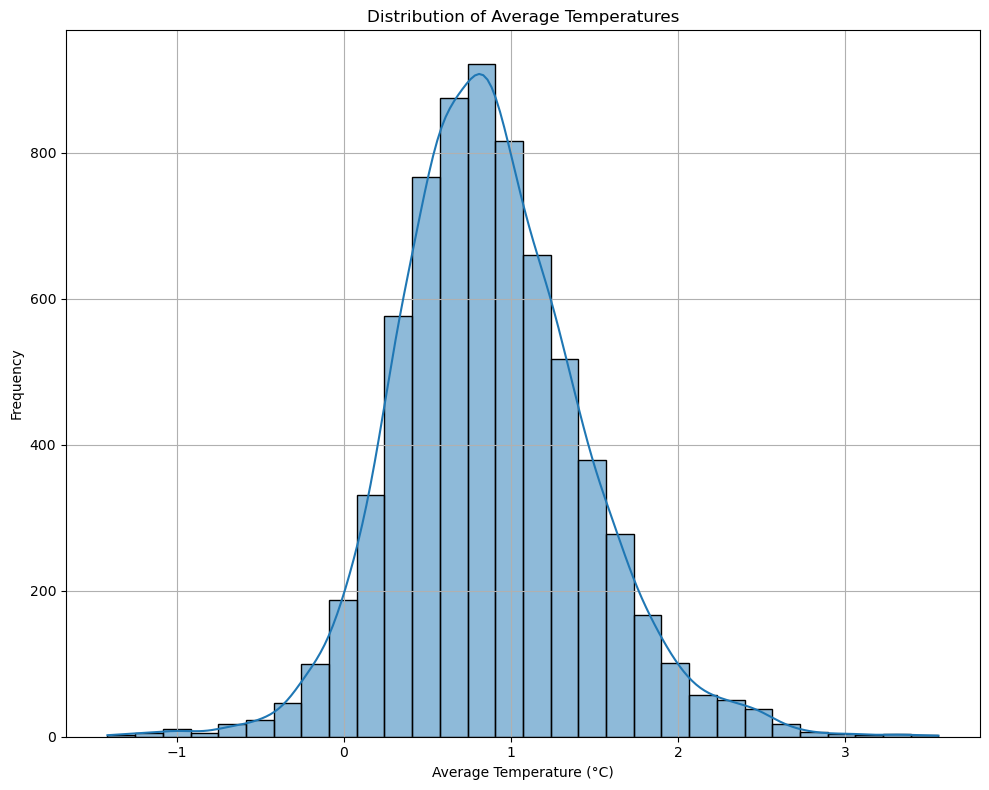

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('cleaned_co2_emissions_from_agri.csv')

# Strip whitespace from column names and convert to lowercase
df.columns = df.columns.str.strip().str.lower()

# Check the column names
print(df.columns)

# Plotting the distribution of average temperatures
plt.figure(figsize=(10, 8))
sns.histplot(df['average_temperature_°c'], kde=True, bins=30)
plt.title('Distribution of Average Temperatures')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()



# Time Series of Average Temperature by Country

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('co2_emissions_from_agri.csv')

# Selected countries
selected_countries = ['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Australia']

# Plot total emissions over time
plt.figure(figsize=(14, 7))
for country in selected_countries:
    country_data = df[df['Area'] == country]
    plt.plot(country_data['Year'], country_data['total_emission'], label=country)

plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.title('Total Emissions Over Time by Country')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation Heatmap of Numerical Features

In [ ]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# Top 10 Countries of Total Emissions

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('cleaned_co2_emissions_from_agri.csv')

# Strip whitespace from column names and convert to lowercase
df.columns = df.columns.str.strip().str.lower()

# Group by 'area' and sum the 'total_emission', then sort and get top 10
top_countries = df.groupby('area')['total_emission'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Emissions')
plt.xlabel('Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Total emission of Top 10 and Bottom 10 Countries 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('cleaned_co2_emissions_from_agri.csv')

# Strip whitespace from column names and convert to lowercase
df.columns = df.columns.str.strip().str.lower()

# Group by 'area' and sum the 'total_emission', then sort and get top 10 and bottom 10
total_emissions = df.groupby('area')['total_emission'].sum().sort_values(ascending=False)
top_10_countries = total_emissions.head(10)
bottom_10_countries = total_emissions.tail(10)

# Combine top 10 and bottom 10 into a single DataFrame
combined_countries = pd.concat([top_10_countries, bottom_10_countries])

# Plotting
plt.figure(figsize=(14, 7))
combined_countries.plot(kind='bar', color=['brown']*10 + ['lightgreen']*10)
plt.title('Total emission of Top 10 and Bottom 10 Countries')
plt.xlabel('Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Modelling 

In [ ]:
# Assuming you have a model and predictions
residuals = observed_values - predicted_values


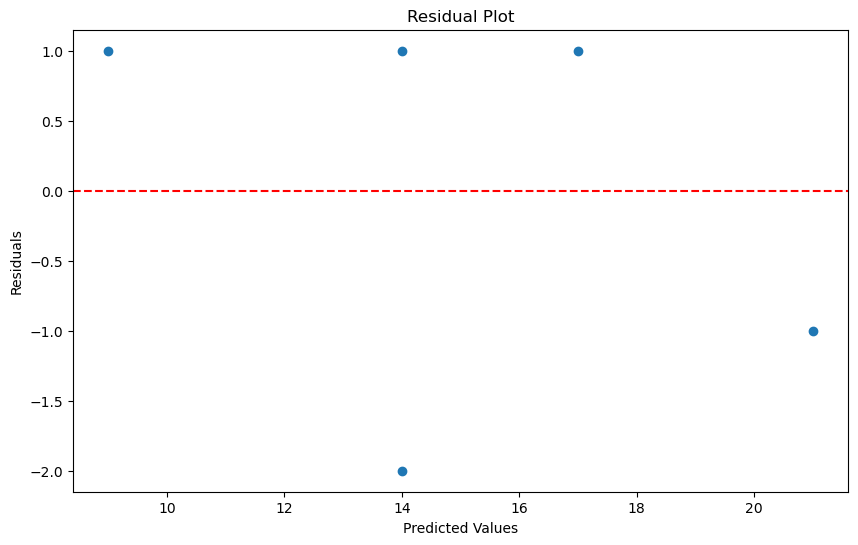

In [13]:
# Plot Residuals: Create a residual plot to visualize the residuals.

#Calculate Residuals: Residuals are the differences between the observed values and the predicted values from your model.

import numpy as np
import matplotlib.pyplot as plt

# Example data
observed_values = np.array([10, 12, 15, 18, 20])
predicted_values = np.array([9, 14, 14, 17, 21])

# Calculate residuals
residuals = observed_values - predicted_values

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()



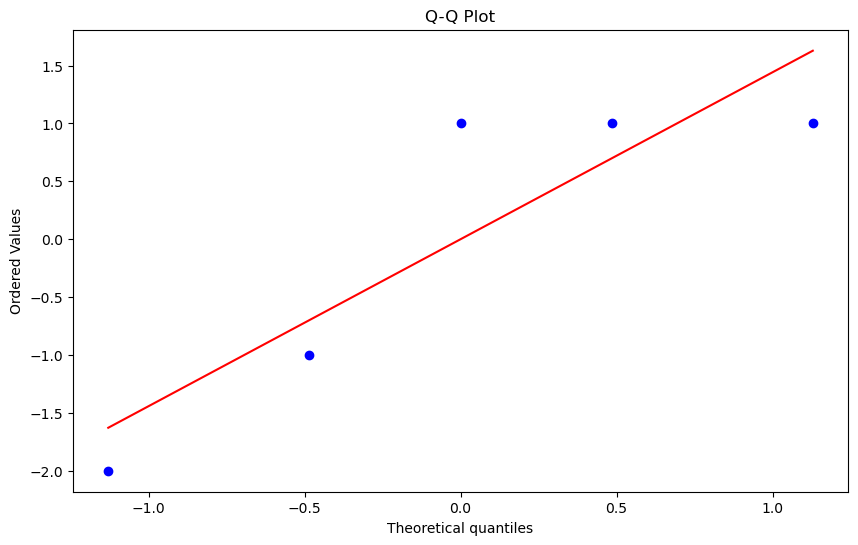

In [14]:
# 1. Check for Patterns: In a good model, residuals should be randomly distributed around zero. 
# Patterns or trends in the residual plot indicate potential issues with the model.

# 2. Normality of Residuals: Check if residuals are normally distributed using a histogram or a Q-Q plot.

import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


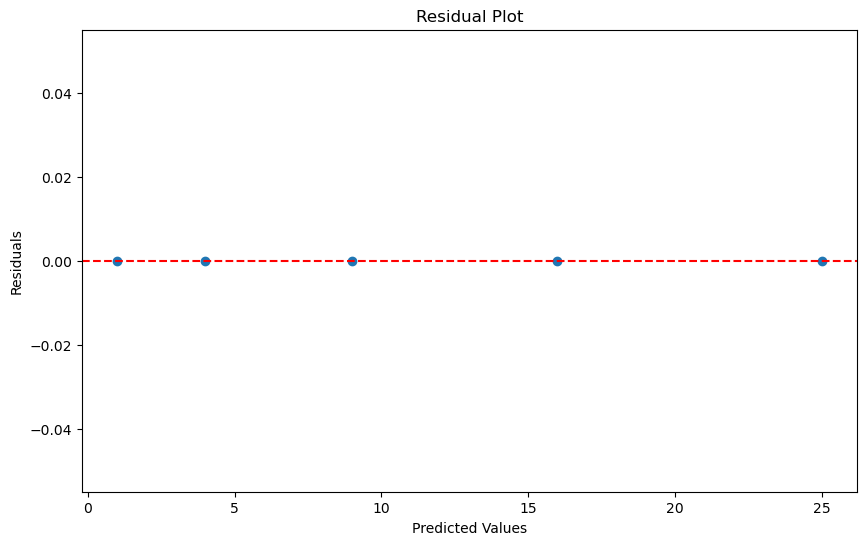

In [15]:
# Decision Tree Regression Example: to test your data and perform residual analysis.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Example data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 4, 9, 16, 25])

# Create and fit the model
model = DecisionTreeRegressor()
model.fit(X, y)

# Predictions
predicted_values = model.predict(X)

# Calculate residuals
residuals = y - predicted_values

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

